# Programming Exercise 5: Regularized Linear Regression and Bias vs Variance

> In this exercise, you will implement regularized linear regression and use it to study models with different bias-variance properties. 

## 1. Regularized Linear Regression

### 1.1 Visualizing the Dataset

> You will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir.

In [476]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

mat = scipy.io.loadmat('data/ex5data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

The dataset has training, cross validation and test sets.

In [477]:
df = pd.DataFrame(data = {'water_level': mat['X'].T[0], 'water_flowing': mat['y'].T[0]})
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
water_level,-15.936758,-29.152979,36.189549,37.492187,-48.058829,-8.941458,15.307793,-34.706266,1.389154,-44.383760,7.013502,22.762749
water_flowing,2.134311,1.173257,34.359109,36.837955,2.808965,2.121072,14.710268,2.614184,3.740172,3.731691,7.627659,22.752428


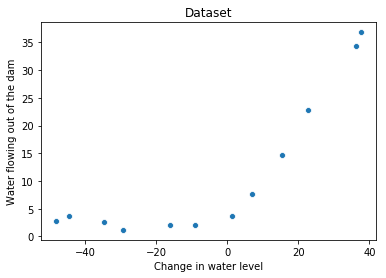

In [478]:
ax = sns.scatterplot(x='water_level', y='water_flowing', data=df)
ax.set(xlabel='Change in water level', ylabel='Water flowing out of the dam', title='Dataset');

### 1.2 Regularized Linear Regression Cost Function

$$ J(\theta) = \frac{1}{2m} (\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2) + \frac{\lambda}{2m}(\sum_{j=1}^n\theta_j^2)$$

The regularization parameter $\lambda$ puts a penalty on the overal cos $J$ and help preventing overfitting.

In [479]:
def linear_regression_cost(X, y, theta, lambda_r):
    m = X.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y)) + (lambda_r/(2*m)) * np.sum(theta[1:,:]**2)
    return J

In [480]:
theta = np.ones(shape=(X.shape[1],1))
m = len(df)
X = np.hstack((np.ones((m,1)), df.water_level.values.reshape(-1,1)))
y = df.water_flowing.values.reshape(-1,1)
J = linear_regression_cost(X, y, theta, 1)
print('Cost at theta = [1 ; 1]:', J, '\n(this value should be about 303.993192)')

Cost at theta = [1 ; 1]: [[ 303.99319222]] 
(this value should be about 303.993192)


### 1.3 Regularized Linear Regression Gradient

$$\frac{\partial J(\theta)}{\partial\theta_0} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \text{for} \ j=0$$

$$\frac{\partial J(\theta)}{\partial\theta_j} = (\frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}) + \frac{\lambda}{m}\theta_j \text{for} \ j\ge1$$

In [481]:
def linear_regression_cost_function(theta, X, y, lambda_r):
    m = X.shape[0]
    theta = theta[:, np.newaxis] 
    
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y)) + (lambda_r/(2*m)) * np.sum(theta[1:,:]**2)
    
    grad = (1/m) * (h-y).T.dot(X) + (lambda_r/m) * theta.T
    grad[0, 0] = (1/m) * (h-y).T.dot(X[:,0])
    return J, grad

In [482]:
theta = np.ones(shape=(X.shape[1]))
J, grad = linear_regression_cost_function(theta, X, y, 1);
print('Gradient at theta = [1 ; 1]:', grad, '\n(this value should be about [-15.303016; 598.250744]')

Gradient at theta = [1 ; 1]: [[ -15.30301567  598.25074417]] 
(this value should be about [-15.303016; 598.250744]


### 1.4 Fitting Linear Regression

In [483]:
import scipy.optimize as opt
def train_linear_regression(X, y, lambda_r):
    theta = np.ones(shape=(X.shape[1]))
    opt_results = opt.minimize(linear_regression_cost_function, theta, args=(X, y, lambda_r), 
                                method='L-BFGS-B', jac=True, options={'maxiter':200})
    return opt_results['x']

In [484]:
lambda_r = 0
theta_final = train_linear_regression(X, y, lambda_r)

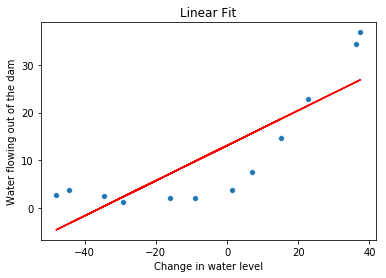

In [485]:
ax = sns.scatterplot(x='water_level', y='water_flowing', data=df)
plt.plot(X[:,1], X.dot(theta_final), color='r')
ax.set(xlabel='Change in water level', ylabel='Water flowing out of the dam', title='Linear Fit');

* Since the data is not linear, linear regression can't have a good fit.

## 2. Bias-variance

High bias: underfitting
<br>
High variance: overfitting

### 2.1 Learning Curves

Plots training and validation error as a function of training set size.

In [486]:
df_val = pd.DataFrame(data = {'water_level': mat['Xval'].T[0], 'water_flowing': mat['yval'].T[0]})
df_val.T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
water_level,-16.746536,-14.577471,34.515759,-47.010076,36.975119,-40.68611,-4.472011,26.533635,-42.797683,25.374099,...,27.311769,-3.263862,-1.818276,-40.719662,-50.013244,-17.411772,3.588194,7.085480,46.282369,14.612289
water_flowing,4.170202,4.067263,31.873068,10.623656,31.836021,4.95937,4.451599,22.276318,-0.000044,20.503802,...,19.365053,4.883763,11.097159,7.461708,1.476935,2.719164,10.926901,8.348712,52.781928,13.357340


In [487]:
Xval = df_val.water_level.values.reshape(-1,1)
Xval = np.hstack((np.ones((Xval.shape[0],1)), Xval))
yval = df_val.water_flowing.values.reshape(-1,1)

In [488]:
def learning_curve(X, y, Xval, yval, lambda_r):
    m = X.shape[0]
    error_train = np.zeros((m,1))
    error_val = np.zeros((m,1))
    for i in range(1,m):
        theta = train_linear_regression(X[:i, :], y[:i], lambda_r)
        error_train[i], _ = linear_regression_cost_function(theta, X[:i,:], y[:i], 0)
        error_val[i], _ = linear_regression_cost_function(theta, Xval, yval, 0)
    return error_train, error_val

In [489]:
lambda_r = 0
error_train, error_val = learning_curve(X, y, Xval, yval, lambda_r)

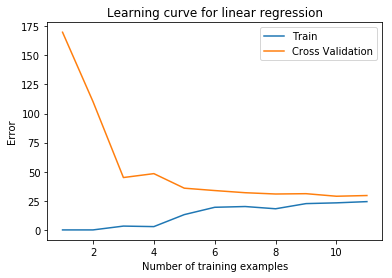

In [490]:
sns.lineplot(x=range(1,m), y=error_train.T[0][1:])
ax = sns.lineplot(x=range(1,m), y=error_val.T[0][1:])
ax.set(xlabel='Number of training examples', ylabel='Error', title='Learning curve for linear regression');
ax.legend(['Train', 'Cross Validation']);

In [491]:
df_error = pd.DataFrame(data={'error_train': error_train.T[0][1:], 'error_val': error_val.T[0][1:]})
df_error.T

,0,1,2,3,4,5,6,7,8,9,10
error_train,9.860761e-32,3.334883e-15,3.286595,2.842678,13.154049,19.443963,20.098522,18.172859,22.609405,23.261462,24.31725
error_val,1.698707e+02,1.103004e+02,45.010231,48.368911,35.865163,33.829961,31.970985,30.862444,31.135997,28.936204,29.55143


Both train error and cross validation error are high when the number of training examples is increased, that is, **high bias problem**, the model is too simple and unable to fit the dataset.

## 3. Polynomial Regression

We can add more features to try to solve the underfitting problem. 

Polynomial regression hypothesis for the current problem:

$$h_\theta(x) = \theta_0 + \theta_1 * (waterLevel) + \theta_2 * (waterLevel)^2 + ... + \theta_p * (waterLevel)^p = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_px_p$$

In [492]:
def poly_features(X, p):
    X_poly = np.zeros((X.shape[0], p))
    for i in range(p):
        X_poly[:,i] = X**(i+1)
    return X_poly

### 3.1 Learning Polynomial Regression

Normalizing features:

In [493]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [494]:
p = 8
X_poly = poly_features(mat['X'].T[0], p)
X_poly, mu, sigma = feature_normalize(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0],1)), X_poly))

In [495]:
X_poly_test = poly_features(mat['Xtest'].T[0], p)
X_poly_test, _, _ = feature_normalize(X_poly_test, mu, sigma)
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0],1)), X_poly_test))

In [496]:
X_poly_val = poly_features(mat['Xval'].T[0], p)
X_poly_val, _, _ = feature_normalize(X_poly_val, mu, sigma)
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0],1)), X_poly_val))

Training model and plotting:

In [497]:
def train_and_plot_fit_learning_curve(X, X_poly, y, X_poly_val, yval, lambda_r):
    theta = train_linear_regression(X_poly, y, lambda_r)

    plt.figure(figsize=(15,5))
    plt.subplot(121)
    ax = sns.scatterplot(x=X[:,1], y=y.T[0])
    x = np.arange(np.min(X)-15.0, np.max(X)+25.0, 0.05)
    plot_X_poly = poly_features(x, p)
    plot_X_poly, _, _ = feature_normalize(plot_X_poly, mu, sigma)
    plot_X_poly = np.hstack((np.ones((plot_X_poly.shape[0],1)), plot_X_poly))
    plt.plot(x, plot_X_poly.dot(theta), 'k--', color='r')
    ax.set(xlabel='Change in water level', ylabel='Water flowing out of the dam', 
           title='Polynomial Regression Fit ($\lambda$ = {})'.format(lambda_r));
    
    error_train, error_val = learning_curve(X_poly, y, X_poly_val, yval, lambda_r)
    plt.subplot(122)
    sns.lineplot(x=range(1,m), y=error_train.T[0][1:])
    ax = sns.lineplot(x=range(1,m), y=error_val.T[0][1:])
    ax.set(xlabel='Number of training examples', ylabel='Error', 
           title='Polynomial Regression Learning Curve ($\lambda$ = {})'.format(lambda_r));
    ax.legend(['Train', 'Cross Validation']);
    
    plt.subplots_adjust(wspace=0.2)
    plt.show()

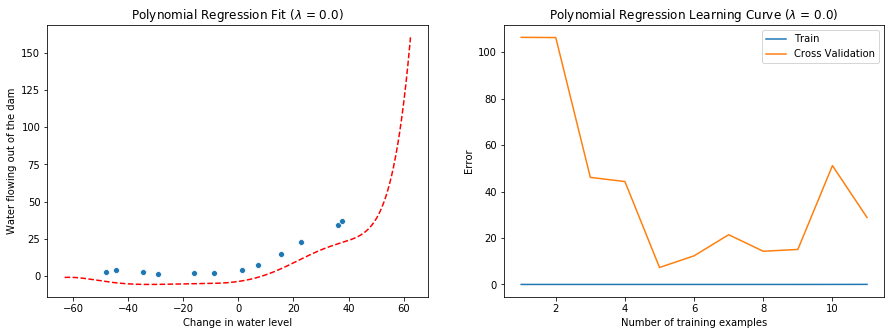

In [498]:
lambda_r = 0.0
train_and_plot_fit_learning_curve(X, X_poly, y, X_poly_val, yval, lambda_r)

The plots shows the overfitting

### 3.2 Adjusting the regularization parameter

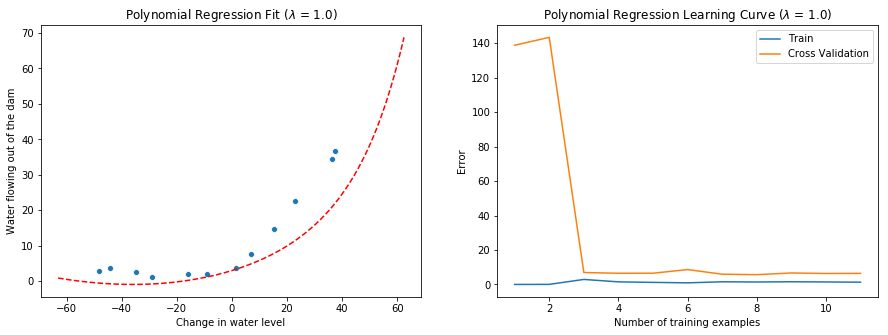

In [499]:
lambda_r = 1.0
train_and_plot_fit_learning_curve(X, X_poly, y, X_poly_val, yval, lambda_r)

With $\lambda=1$, the model does not have the high-bias or high-variance problems

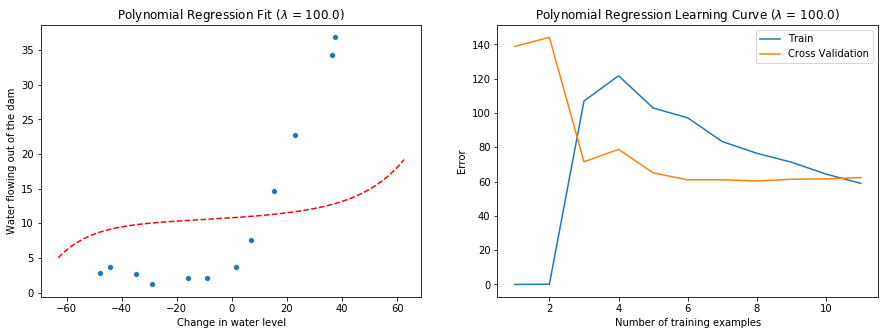

In [500]:
lambda_r = 100.0
train_and_plot_fit_learning_curve(X, X_poly, y, X_poly_val, yval, lambda_r)

With $\lambda=100$, the model is underfitting

### 3.3 Selecting $\lambda$ using a cross validation set

In [501]:
def validation_curve(X, y, Xval, yval):
    lambda_values = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    error_train = np.zeros((len(lambda_values),1))
    error_val = np.zeros((len(lambda_values),1))
    for i,l in enumerate(lambda_values):
        theta = train_linear_regression(X, y, l)
        error_train[i], _ = linear_regression_cost_function(theta, X, y, 0)
        error_val[i], _ = linear_regression_cost_function(theta, Xval, yval, 0)
    return lambda_values, error_train, error_val

In [502]:
lambda_values, error_train, error_val = validation_curve(X_poly, y, X_poly_val, yval)

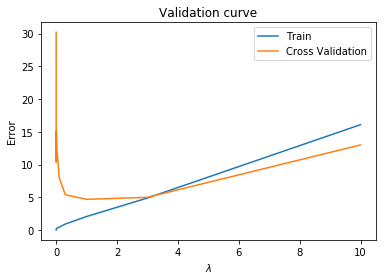

In [503]:
sns.lineplot(x=np.array(lambda_values), y=error_train.T[0])
ax = sns.lineplot(x=lambda_values, y=error_val.T[0])
ax.set(xlabel='$\lambda$', ylabel='Error', title='Validation curve');
ax.legend(['Train', 'Cross Validation']);

In [504]:
theta = train_linear_regression(X_poly, y, 3.0)
J, grad = linear_regression_cost_function(theta, X_poly_test, mat['ytest'], 0)
J

array([[ 11.64373681]])